In [3]:
%load_ext autoreload
%autoreload 2

In [18]:
from side_functions import *

### Test naïve bag-of-words

In [240]:
train, test = get_train_test_data()

In [221]:
corpus, dictionary, ldamodel = get_lda_model(train)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Valentin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [222]:
display_lda_model(corpus, dictionary, ldamodel)

In [223]:
pipe = train_on_dataset(train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.7min finished


                        precision    recall  f1-score   support

              Désastre       0.87      0.74      0.80       938
Impossible de trancher       0.83      1.00      0.91         5
       Pas de désastre       0.83      0.92      0.87      1270

              accuracy                           0.84      2213
             macro avg       0.84      0.88      0.86      2213
          weighted avg       0.84      0.84      0.84      2213



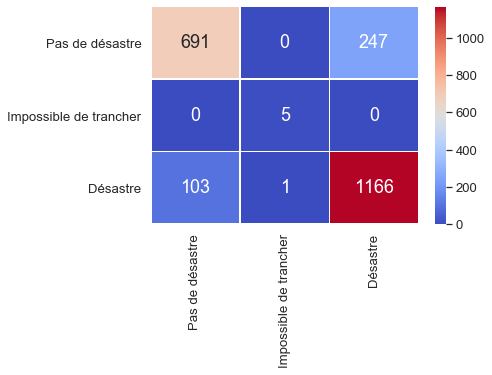

Pas de désastre 0.8279447301308582
Impossible de trancher 0.5
Désastre 0.8280901128080094


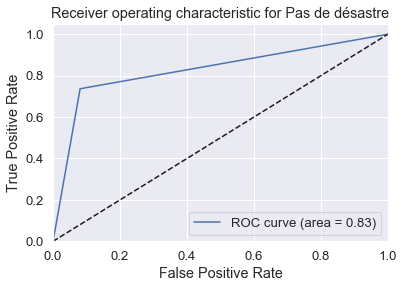

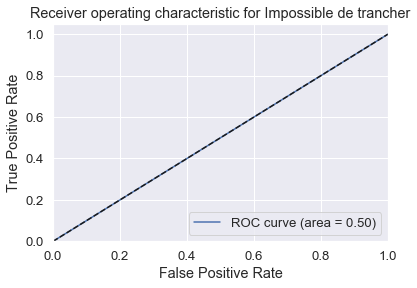

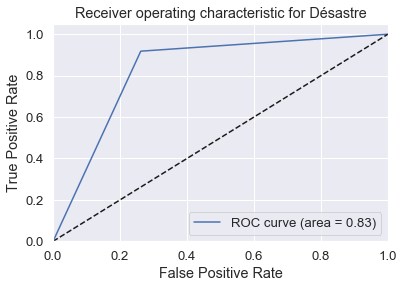

In [242]:
test_on_dataset(pipe, test)

### Test bag-of-words with words concatenation

In [243]:
train, test = get_train_test_data(find_and_concatenate_expressions=True)

In [244]:
pipe = train_on_dataset(train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.4min finished


                        precision    recall  f1-score   support

              Désastre       0.79      0.64      0.71       953
Impossible de trancher       0.00      0.00      0.00         6
       Pas de désastre       0.75      0.87      0.81      1206

              accuracy                           0.76      2165
             macro avg       0.51      0.50      0.50      2165
          weighted avg       0.77      0.76      0.76      2165



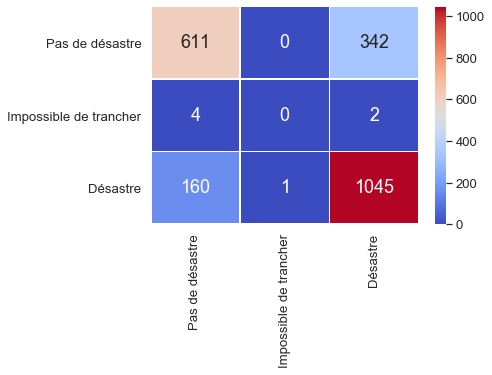

Pas de désastre 0.7529098660128343
Impossible de trancher 0.5
Désastre 0.7538969213715918


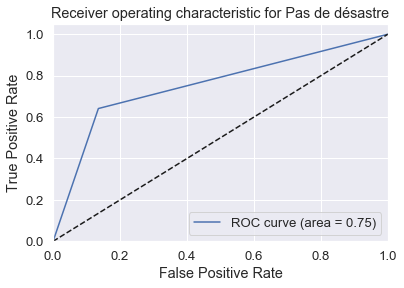

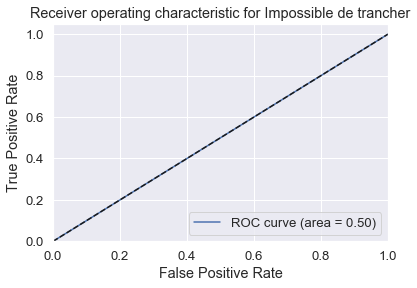

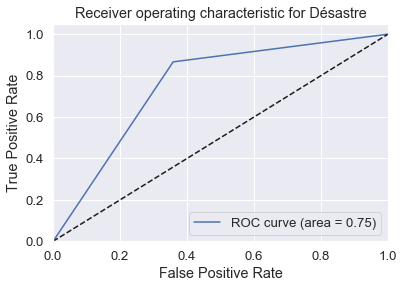

0.7585213634181469

In [246]:
test_on_dataset(pipe, test)

### Test word2vec models

In [10]:
train, test = get_train_test_data(find_and_concatenate_expressions=True)

In [11]:
w2v = train_word2vec(train["token_retreated_text"])

In [12]:
pipe = train_on_dataset(train, option="w2v", w2v_model=w2v)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.3min finished


                        precision    recall  f1-score   support

              Désastre       0.78      0.61      0.68       955
Impossible de trancher       0.00      0.00      0.00         4
       Pas de désastre       0.74      0.87      0.80      1225

              accuracy                           0.75      2184
             macro avg       0.51      0.49      0.49      2184
          weighted avg       0.75      0.75      0.74      2184



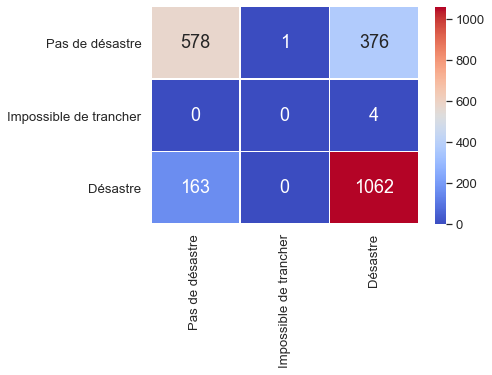

Pas de désastre 0.7363037245621733
Impossible de trancher 0.5
Désastre 0.7353463429167288


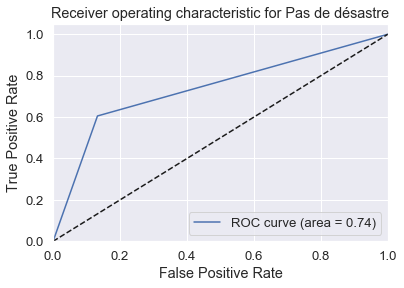

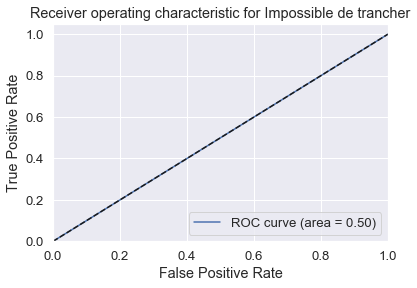

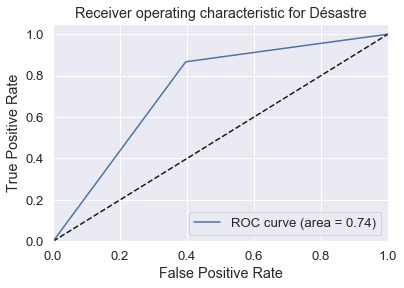

In [13]:
test_on_dataset(pipe, test, option="w2v", w2v_model=w2v)

In [20]:
tsne_results = compute_tsne(train, w2v)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8692 samples in 0.296s...
[t-SNE] Computed neighbors for 8692 samples in 17.354s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8692
[t-SNE] Computed conditional probabilities for sample 2000 / 8692
[t-SNE] Computed conditional probabilities for sample 3000 / 8692
[t-SNE] Computed conditional probabilities for sample 4000 / 8692
[t-SNE] Computed conditional probabilities for sample 5000 / 8692
[t-SNE] Computed conditional probabilities for sample 6000 / 8692
[t-SNE] Computed conditional probabilities for sample 7000 / 8692
[t-SNE] Computed conditional probabilities for sample 8000 / 8692
[t-SNE] Computed conditional probabilities for sample 8692 / 8692
[t-SNE] Mean sigma: 4.525751
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.968834
[t-SNE] KL divergence after 300 iterations: 2.309826


C:\Users\Valentin\Desktop\Simon\Project\nlp_ensae_2020\side_functions.py:251: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  df_subset['tsne-2d-one'] = tsne_results[:, 0]


TypeError: unhashable type: 'slice'

In [23]:
tsne_results[:, 0]

array([-2.9102342, -1.5478649, -2.433934 , ...,  1.3681836,  6.958549 ,
        0.0837952], dtype=float32)

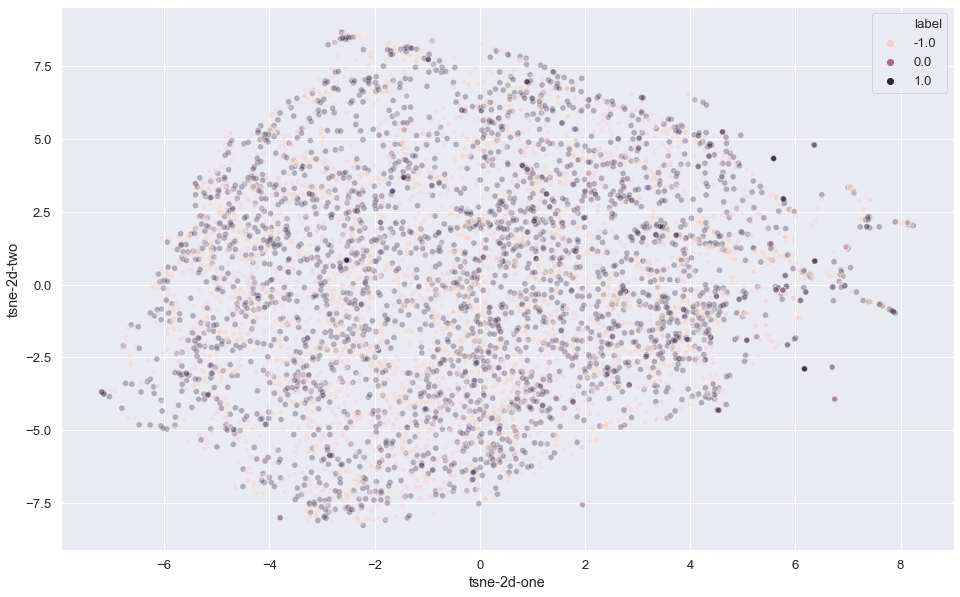

In [26]:
plot_tsne(train, tsne_results)